## LAB 5: LLM Scaling Laws

Scaling Laws in Large Language Models (LLMs) describe how changes in model size, data quantity, and computational resources affect model performance. Understanding these relationships is crucial for designing efficient and effective models.

In this lab, we'll explore:

* How increasing model size impacts performance.
* The trade-offs between computational cost (in our case "Time") and accuracy.

To make these exercises practical, we'll use pre-trained transformer models from the Hugging Face library and fine-tune them on a text classification task.

In [ ]:
# !pip install transformers==4.30.0

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

In this exercise, we'll fine-tune transformer models of varying sizes on the AG News dataset and observe how the model size affects performance.

In [ ]:
dataset = load_dataset('ag_news')
metric = load_metric('accuracy')

We'll select pre-trained models of varying sizes from Hugging Face.

In [3]:
model_names = [
    'google/bert_uncased_L-2_H-128_A-2',   
    'google/bert_uncased_L-4_H-256_A-4',   
    'google/bert_uncased_L-6_H-512_A-8',   
    # You can also add the following models to compare the performance
    # 'bert-base-uncased',                   
    # 'bert-large-uncased',                  
]

In [4]:
def preprocess_function(examples, tokenizer):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

In [5]:
results = []

for model_name in model_names:
    print(f"\nProcessing model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    

    tokenized_datasets = dataset.map(
        lambda x: preprocess_function(x, tokenizer), 
        batched=True
    )
    tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
    tokenized_datasets.set_format(
        'torch', 
        columns=['input_ids', 'attention_mask', 'labels']
    )
    

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4).to('cuda')
    

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=1,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        evaluation_strategy="epoch",
        save_strategy="no",
        logging_strategy="no",
        load_best_model_at_end=False,
        seed=42,
        report_to=None
    )
    

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets['train'],
        eval_dataset=tokenized_datasets['test'],
        compute_metrics=lambda p: {
            'accuracy': metric.compute(
                predictions=np.argmax(p.predictions, axis=1), 
                references=p.label_ids
            )['accuracy']
        }
    )
    
    # Fine-tune the model
    ############### YOUR CODE STARTS HERE ###############
    # Train the model
    # Record the time taken to train the model

    start_time = time.time()
    trainer.train()
    training_time = time.time() - start_time
    ############### YOUR CODE ENDS HERE #################
    
    # Evaluate the model
    ############### YOUR CODE STARTS HERE ###############
    # Use the trainer to evaluate the model
    eval_result = trainer.evaluate()
    ############### YOUR CODE ENDS HERE #################
    accuracy = eval_result['eval_accuracy']
    
    # Get model size
    ############### YOUR CODE STARTS HERE ###############
    # Calculate the total number of parameters in the model
    model_size = sum(p.numel() for p in model.parameters())
    ############### YOUR CODE ENDS HERE #################
    
    results.append({
        'model_name': model_name,
        'model_size': model_size,
        'training_time': training_time,
        'accuracy': accuracy
    })
    
    print(f"Model Size: {model_size}, Training Time: {training_time:.2f}s, Accuracy: {accuracy:.4f}")


Processing model: google/bert_uncased_L-2_H-128_A-2


config.json: 100%|██████████| 382/382 [00:00<00:00, 831kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 8.02MB/s]
Map: 100%|██████████| 7600/7600 [00:00<00:00, 12470.92 examples/s]
model.safetensors: 100%|██████████| 17.7M/17.7M [00:00<00:00, 134MB/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-2_H-128_A-2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: razaimam45 (r45). Use `wandb login --relogin` to force relogin


/home/raza.imam/.conda/envs/MMAttack/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.346458,0.897763


/home/raza.imam/.conda/envs/MMAttack/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Model Size: 4386436, Training Time: 129.34s, Accuracy: 0.8978

Processing model: google/bert_uncased_L-4_H-256_A-4


config.json: 100%|██████████| 383/383 [00:00<00:00, 508kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 34.0MB/s]
Map: 100%|██████████| 7600/7600 [00:00<00:00, 12241.91 examples/s]
pytorch_model.bin: 100%|██████████| 45.1M/45.1M [00:00<00:00, 150MB/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-4_H-256_A-4 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/raza.imam/.conda/envs/MMAttack/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.252283,0.915395


/home/raza.imam/.conda/envs/MMAttack/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Model Size: 11171588, Training Time: 164.02s, Accuracy: 0.9154

Processing model: google/bert_uncased_L-6_H-512_A-8


config.json: 100%|██████████| 383/383 [00:00<00:00, 533kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 55.9MB/s]
Map: 100%|██████████| 7600/7600 [00:00<00:00, 9212.30 examples/s] 
pytorch_model.bin: 100%|██████████| 141M/141M [00:00<00:00, 207MB/s] 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-6_H-512_A-8 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/raza.imam/.conda/envs/MMAttack/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.188685,0.935789


/home/raza.imam/.conda/envs/MMAttack/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Model Size: 35070468, Training Time: 271.07s, Accuracy: 0.9358


In [6]:
df_results = pd.DataFrame(results)
df_results['model_size_millions'] = df_results['model_size'] / 1e6

print("\nFinal Results:")
display(df_results)


Final Results:


,model_name,model_size,training_time,accuracy,model_size_millions
0,google/bert_uncased_L-2_H-128_A-2,4386436,129.339777,0.897763,4.386436
1,google/bert_uncased_L-4_H-256_A-4,11171588,164.019613,0.915395,11.171588
2,google/bert_uncased_L-6_H-512_A-8,35070468,271.066700,0.935789,35.070468


Plot the results for Model Size vs. Accuracy to compare the performance of the models.

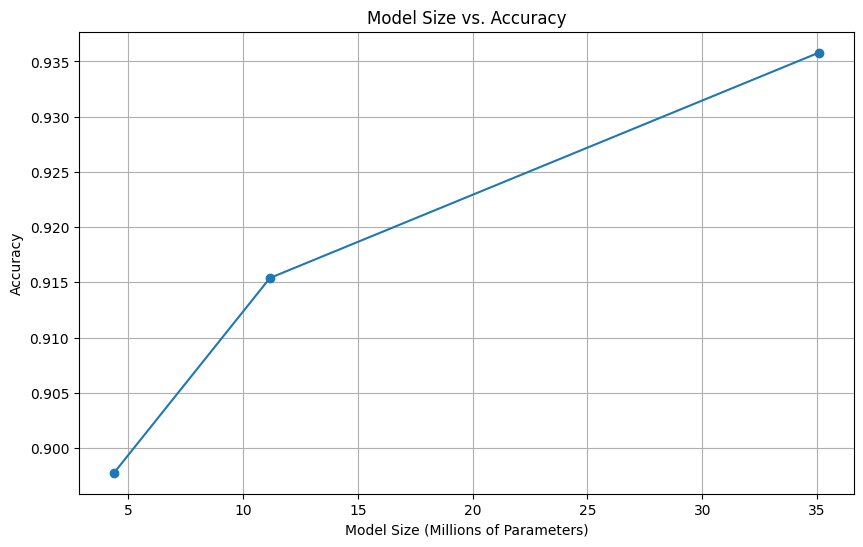

In [8]:
############### YOUR CODE STARTS HERE ###############
# Plot the model size vs. accuracy
plt.show()
############### YOUR CODE ENDS HERE #################
############### YOUR CODE STARTS HERE ###############
# Plot the model size vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(df_results['model_size_millions'], df_results['accuracy'], marker='o')
plt.xlabel('Model Size (Millions of Parameters)')
plt.ylabel('Accuracy')
plt.title('Model Size vs. Accuracy')
plt.grid(True)
plt.show()
############### YOUR CODE ENDS HERE #################

Plot the results for Computation Time vs. Accuracy to compare the computation cost of the models.

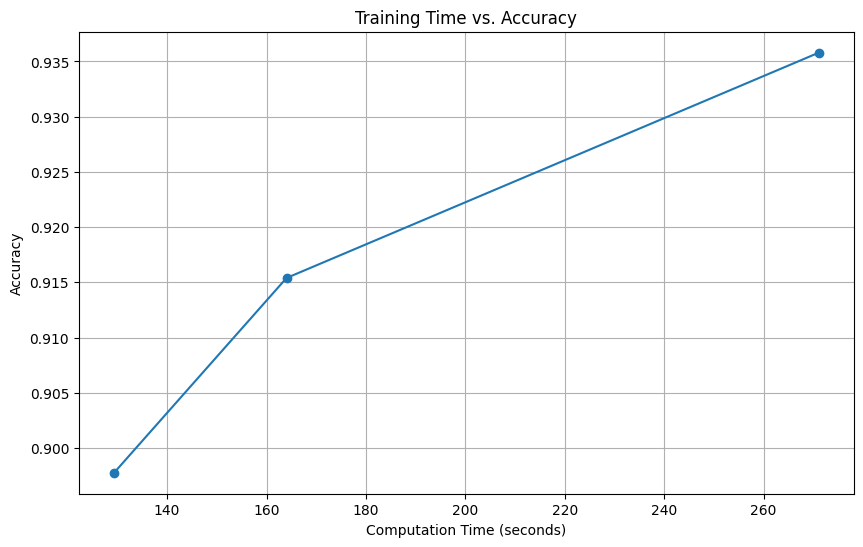

In [10]:
############### YOUR CODE STARTS HERE ###############
# Plot the model size vs. accuracy
plt.show()
############### YOUR CODE ENDS HERE #################
############### YOUR CODE STARTS HERE ###############
# Plot the computation time vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(df_results['training_time'], df_results['accuracy'], marker='o')
plt.xlabel('Computation Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Training Time vs. Accuracy')
plt.grid(True)
plt.show()
############### YOUR CODE ENDS HERE #################